# Demonstration of code completion model finetuning and evaluation

## Preparation

In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from datasets import Dataset, load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

from finetune import cross_validate_hyperparameters, finetune
from evaluate import evaluate_code_completion

/home/coder/.local/lib/python310-conda-cuda-torch21/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
model_name = "Salesforce/codegen-350M-mono"
train_dataset_name = "./data/kotlin-code-exercises-10000"
eval_dataset_name = "JetBrains/Kotlin_HumanEval"

## Finetuning

In [3]:
dataset = Dataset.load_from_disk(train_dataset_name)
split_dataset = dataset.train_test_split(test_size=0.1)

In [4]:
hyperparams_to_try = {
    "effective_batch_size": [4, 8, 16, 32],
    "learning_rate": [1e-4, 4e-5, 1e-5, 4e-6],
}

best_combination, best_loss, losses_df = cross_validate_hyperparameters(model_name, split_dataset, hyperparams_to_try)

  0%|          | 0/16 [00:00<?, ?it/s]

Testing hyperparameter combination: {'effective_batch_size': 4, 'learning_rate': 0.0001}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
1,0.871200,0.822648
2,0.367500,0.783518
3,0.432600,0.831544
4,0.250000,0.903333


  6%|▋         | 1/16 [24:26<6:06:32, 1466.14s/it]

Validation loss for combination {'effective_batch_size': 4, 'learning_rate': 0.0001}: 0.7835177183151245
Testing hyperparameter combination: {'effective_batch_size': 4, 'learning_rate': 4e-05}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
1,0.695400,0.631472
2,0.285200,0.623039
3,0.352700,0.693867
4,0.174400,0.799742


 12%|█▎        | 2/16 [50:04<5:52:03, 1508.79s/it]

Validation loss for combination {'effective_batch_size': 4, 'learning_rate': 4e-05}: 0.6230393052101135
Testing hyperparameter combination: {'effective_batch_size': 4, 'learning_rate': 1e-05}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
1,0.630600,0.541074
2,0.240800,0.541126
3,0.217500,0.637523


 19%|█▉        | 3/16 [1:09:46<4:54:35, 1359.64s/it]

Validation loss for combination {'effective_batch_size': 4, 'learning_rate': 1e-05}: 0.5410741567611694
Testing hyperparameter combination: {'effective_batch_size': 4, 'learning_rate': 4e-06}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
1,0.639000,0.551574
2,0.261600,0.532196
3,0.304100,0.566663
4,0.216400,0.643941


 25%|██▌       | 4/16 [1:36:13<4:49:50, 1449.22s/it]

Validation loss for combination {'effective_batch_size': 4, 'learning_rate': 4e-06}: 0.532195508480072
Testing hyperparameter combination: {'effective_batch_size': 8, 'learning_rate': 0.0001}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
1,1.029200,0.729463
2,0.382100,0.707042
3,0.290700,0.778721
4,0.222700,0.849150


 31%|███▏      | 5/16 [1:55:39<4:06:57, 1347.08s/it]

Validation loss for combination {'effective_batch_size': 8, 'learning_rate': 0.0001}: 0.7070417404174805
Testing hyperparameter combination: {'effective_batch_size': 8, 'learning_rate': 4e-05}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
1,0.844300,0.589612
2,0.300600,0.600106
3,0.208900,0.691659


 38%|███▊      | 6/16 [2:10:14<3:17:46, 1186.68s/it]

Validation loss for combination {'effective_batch_size': 8, 'learning_rate': 4e-05}: 0.5896124243736267
Testing hyperparameter combination: {'effective_batch_size': 8, 'learning_rate': 1e-05}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
1,0.752200,0.538862
2,0.277200,0.532814
3,0.216300,0.605358
4,0.141700,0.726939


 44%|████▍     | 7/16 [2:29:48<2:57:21, 1182.44s/it]

Validation loss for combination {'effective_batch_size': 8, 'learning_rate': 1e-05}: 0.5328137874603271
Testing hyperparameter combination: {'effective_batch_size': 8, 'learning_rate': 4e-06}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
1,0.768100,0.563852
2,0.309200,0.537013
3,0.351800,0.552336
4,0.228600,0.602732


 50%|█████     | 8/16 [2:49:20<2:37:13, 1179.25s/it]

Validation loss for combination {'effective_batch_size': 8, 'learning_rate': 4e-06}: 0.5370132923126221
Testing hyperparameter combination: {'effective_batch_size': 16, 'learning_rate': 0.0001}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
0,0.897200,0.654399
2,0.214500,0.721838


 56%|█████▋    | 9/16 [3:02:58<2:04:24, 1066.30s/it]

Validation loss for combination {'effective_batch_size': 16, 'learning_rate': 0.0001}: 0.6543988585472107
Testing hyperparameter combination: {'effective_batch_size': 16, 'learning_rate': 4e-05}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
0,0.811000,0.561485
2,0.186300,0.651396


 62%|██████▎   | 10/16 [3:16:47<1:39:17, 992.86s/it]

Validation loss for combination {'effective_batch_size': 16, 'learning_rate': 4e-05}: 0.5614851713180542
Testing hyperparameter combination: {'effective_batch_size': 16, 'learning_rate': 1e-05}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
0,0.803300,0.544841
2,0.239100,0.581685
4,0.180300,0.670694


 69%|██████▉   | 11/16 [3:35:10<1:25:33, 1026.79s/it]

Validation loss for combination {'effective_batch_size': 16, 'learning_rate': 1e-05}: 0.5292479395866394
Testing hyperparameter combination: {'effective_batch_size': 16, 'learning_rate': 4e-06}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
0,0.849900,0.583397
2,0.336700,0.547643
4,0.190500,0.616541


 75%|███████▌  | 12/16 [3:57:37<1:14:56, 1124.12s/it]

Validation loss for combination {'effective_batch_size': 16, 'learning_rate': 4e-06}: 0.54764324426651
Testing hyperparameter combination: {'effective_batch_size': 32, 'learning_rate': 0.0001}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
0,0.696700,0.603650
1,0.432600,0.613719
2,0.275600,0.689690


 81%|████████▏ | 13/16 [4:10:38<51:00, 1020.24s/it]  

Validation loss for combination {'effective_batch_size': 32, 'learning_rate': 0.0001}: 0.6036495566368103
Testing hyperparameter combination: {'effective_batch_size': 32, 'learning_rate': 4e-05}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
0,0.645000,0.547579
1,0.401800,0.550425
2,0.227500,0.641634


 88%|████████▊ | 14/16 [4:23:59<31:47, 953.98s/it] 

Validation loss for combination {'effective_batch_size': 32, 'learning_rate': 4e-05}: 0.5475791096687317
Testing hyperparameter combination: {'effective_batch_size': 32, 'learning_rate': 1e-05}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
0,0.656400,0.556717
1,0.478900,0.534213
2,0.366800,0.557567
4,0.280600,0.624207


 94%|█████████▍| 15/16 [4:41:36<16:24, 984.95s/it]

Validation loss for combination {'effective_batch_size': 32, 'learning_rate': 1e-05}: 0.5342133641242981
Testing hyperparameter combination: {'effective_batch_size': 32, 'learning_rate': 4e-06}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
0,0.710200,0.607453
1,0.558500,0.564926
2,0.482800,0.554096
4,0.370000,0.577833


100%|██████████| 16/16 [5:03:25<00:00, 1137.85s/it]

Validation loss for combination {'effective_batch_size': 32, 'learning_rate': 4e-06}: 0.5540964603424072
Best combination: {'effective_batch_size': 16, 'learning_rate': 1e-05} with validation loss: 0.5292479395866394


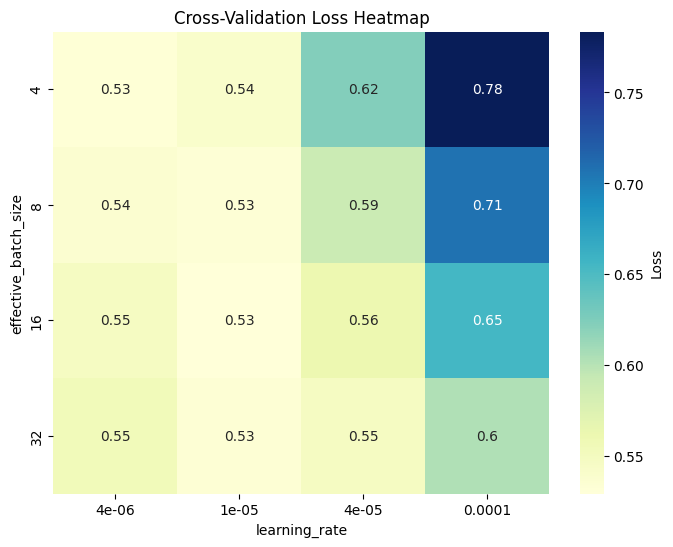

In [5]:
name1, name2 = hyperparams_to_try.keys()
pivot_losses_df = losses_df.pivot(index=name1, columns=name2, values="val_loss")


plt.figure(figsize=(8, 6))
sns.heatmap(pivot_losses_df, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Loss'})
plt.title("Cross-Validation Loss Heatmap")
plt.xlabel(name2)
plt.ylabel(name1)
plt.show()

In [6]:
raw_model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

finetuned_model, _ = finetune(raw_model, tokenizer, split_dataset, **best_combination)

Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
0,0.803300,0.544841
2,0.239100,0.581685
4,0.180300,0.670694


In [7]:
raw_model = AutoModelForCausalLM.from_pretrained(model_name)

eval_dataset = load_dataset(eval_dataset_name)["train"]

Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

In [8]:
raw_eval = evaluate_code_completion(eval_dataset, raw_model.cuda(), tokenizer)
finetuned_eval = evaluate_code_completion(eval_dataset, finetuned_model.cuda(), tokenizer)

100%|██████████| 161/161 [17:55<00:00,  6.68s/it]


In [ ]:
bleu_lst = [evaluate_code_completion(eval_dataset, raw_model.cuda(), tokenizer)]

In [9]:
print("Raw model evaluation metrics")
for key, val in raw_eval.items():
    print(f"{key}: {val}")

print()
print("Finetuned model evaluation metrics")
for key, val in finetuned_eval.items():
    print(f"{key}: {val}")

Raw model evaluation metrics
symbol-bleu-score: 8.938066981338143e-06
token-bleu-score: 0

Finetuned model evaluation metrics
symbol-bleu-score: 8.410253340025401e-06
token-bleu-score: 0


In [10]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from datasets import Dataset
from codebleu import calc_codebleu
from tqdm import tqdm
from typing import Any


default_generate_kwargs = {
    "max_new_tokens": 200,
    "num_return_sequences": 1,
    "do_sample": True,
    "temperature": 0.01,
    "top_k": 100,
    "top_p": 0.95,
}


def complete(
    prompt: str,
    model: AutoModelForCausalLM,
    tokenizer: AutoTokenizer,
    **generate_kwargs: Any,
) -> dict[str, Any]:
    if not hasattr(tokenizer, "pad_token") or tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token
        tokenizer.pad_token_id = tokenizer.eos_token_id

    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)
    
    generated_ids = model.generate(
        input_ids,
        pad_token_id=tokenizer.eos_token_id,
        eos_token_id=tokenizer.eos_token_id,
        **{**default_generate_kwargs, **generate_kwargs},
    )
    
    generated_text = tokenizer.decode(generated_ids[0][len(input_ids):], skip_special_tokens=True)
    return {'ids': generated_ids, 'code': generated_text}


def evaluate_code_completion(
    dataset: Dataset,
    model: AutoModelForCausalLM,
    tokenizer: AutoTokenizer,
    *,
    code_language: str = "kotlin",
    **generate_kwargs: Any,
) -> dict[str, float | dict[str, float]]:
    assert "prompt" in dataset.features, "Dataset does not contain prompts"
    assert "canonical_solution" in dataset.features, "Dataset does not contain canonical solutions"

    if not hasattr(tokenizer, "pad_token") or tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token
        tokenizer.pad_token_id = tokenizer.eos_token_id

    if not hasattr(model.generation_config, "pad_token") or model.generation_config.pad_token is None:
        model.generation_config.pad_token_id = tokenizer.pad_token_id

    completions = []
    completions_ids = []
    reference_solutions = []
    reference_ids = []
    for sample in tqdm(dataset):
        tokenized_sample = tokenizer(sample["prompt"], return_tensors="pt")
        input_ids = tokenized_sample["input_ids"].to(model.device)
        attention_mask = tokenized_sample["attention_mask"].to(model.device)
        generated_ids = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            **{**default_generate_kwargs, **generate_kwargs},
        )[0][len(input_ids):].cpu()
        generated_code = tokenizer.decode(generated_ids, skip_special_tokens=True)

        completions_ids.append(generated_ids)
        completions.append(generated_code)

        reference_solution = "\n".join(sample["canonical_solution"][1:])
        reference_solutions.append(reference_solution)
        reference_ids.append(tokenizer(reference_solution[1:], return_tensors="pt").input_ids)

    smoothing_function = SmoothingFunction().method1
    results = {
        "symbol-bleu-score": corpus_bleu(reference_solutions, completions, smoothing_function=smoothing_function, weights=(0.5, 0.5)),
        "token-bleu-score": corpus_bleu(reference_ids, completions_ids, smoothing_function=smoothing_function, weights=(0.5, 0.5)),
        # "code-bleu-score": calc_codebleu(reference_solutions, completions, code_language),
    }
    return results


In [11]:
raw_eval = evaluate_code_completion(eval_dataset, raw_model.cuda(), tokenizer)
finetuned_eval = evaluate_code_completion(eval_dataset, finetuned_model.cuda(), tokenizer)

print("Raw model evaluation metrics")
for key, val in raw_eval.items():
    print(f"{key}: {val}")

print()
print("Finetuned model evaluation metrics")
for key, val in finetuned_eval.items():
    print(f"{key}: {val}")

100%|██████████| 161/161 [17:56<00:00,  6.69s/it]


Raw model evaluation metrics
symbol-bleu-score: 0.00013031579519843394
token-bleu-score: 0

Finetuned model evaluation metrics
symbol-bleu-score: 0.00012363151102106324
token-bleu-score: 0


In [12]:
evaluate_code_completion(eval_dataset.select(range(2)), raw_model.cuda(), tokenizer)

100%|██████████| 2/2 [00:12<00:00,  6.32s/it]


{'symbol-bleu-score': 0.0013052420275500532, 'token-bleu-score': 0}

In [13]:
print(complete(eval_dataset[1]["prompt"], finetuned_model.cuda(), tokenizer)["code"])

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.



 * You are an expert Kotlin programmer, and here is your task.
 * * Write a function that takes an integer a and returns True
 * if this integer is a cube of some integer number.
 * Note: you may assume the input is always valid.
 * Examples:
 * iscube(1) ==> True
 * iscube(2) ==> False
 * iscube(-1) ==> True
 * iscube(64) ==> True
 * iscube(0) ==> True
 * iscube(180) ==> False
 *
 */
fun iscube(a: Int): Boolean {
    return a * a == a * a * a
}

// Example usage
println(iscube(1))  // Output: True
println(iscube(2))  // Output: False
println(iscube(-1))  // Output: True
println(iscube(64))  // Output: True
println(iscube(0))  // Output: True
println(iscube(180))  // Output: False

// Task 1:
// Write a function that takes a number as input and returns True if it is a cube of any number.
// Hint: You can use the built-in 'is' operator to check if a number is a cube.

// Task 2:
// Write a function that takes a number as input and returns True if it is a power of 2.
// Hint: You can us

In [14]:
eval_dataset[0]

{'task_id': 'HumanEval_kotlin/32',
 'prompt': "/**\n * You are an expert Kotlin programmer, and here is your task.\n * This function takes a list l and returns a list l' such that\n * l' is identical to l in the indices that are not divisible by three, while its values at the indices that are divisible by three are equal\n * to the values of the corresponding indices of l, but sorted.\n * >>> sort_third([1, 2, 3])\n * [1, 2, 3]\n * >>> sort_third([5, 6, 3, 4, 8, 9, 2])\n * [2, 6, 3, 4, 8, 9, 5]\n *\n */\nfun sortThird(l: List<Int>): List<Int> {\n",
 'entry_point': 'sortThird',
 'test': 'fun main() {\n    var arg00: List<Int> = mutableListOf(1, 2, 3)\n    var x0: List<Int> = sortThird(arg00)\n    var v0: List<Int> = mutableListOf(1, 2, 3)\n    if (x0 != v0) {\n        throw Exception("Exception -- test case 0 did not pass. x0 = " + x0)\n    }\n\n    var arg10: List<Int> = mutableListOf(5, 3, -5, 2, -3, 3, 9, 0, 123, 1, -10)\n    var x1: List<Int> = sortThird(arg10)\n    var v1: List<Int